In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import StratifiedKFold

from utilities import load_data

In [21]:
X,y = load_data(100, amplitude=100)

In [19]:
X.shape #2n samples of 400x400 pixels, with a depth of 1 (greyscale type)

(200, 400, 400, 1)

In [22]:
y

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.])

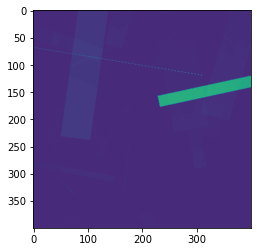

In [25]:
plt.imshow(X[2].reshape(400,400))

In [11]:
skfold = StratifiedKFold(n_splits=5)

In [15]:
acc_per_fold = []
loss_per_fold = []

for train, test in skfold.split(X,y):
    
    #define the model
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(400, 400, 1)),
    keras.layers.Dense(units=1024, activation='relu'),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    #fit the model
    history = model.fit(X[train], y[train], epochs=5, batch_size=10)
    
    #evaluate the model
    scores = model.evaluate(X[test], y[test])
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])



Epoch 1/5
16/16 [==============================] - 9s 586ms/step - loss: 0.8963 - accuracy: 0.5312
Epoch 2/5
16/16 [==============================] - 9s 546ms/step - loss: 1.8832 - accuracy: 0.8375
Epoch 3/5
16/16 [==============================] - 9s 533ms/step - loss: 0.6400 - accuracy: 0.8875
Epoch 4/5
16/16 [==============================] - 8s 507ms/step - loss: 0.3990 - accuracy: 0.9688
Epoch 5/5
2/2 [==============================] - 0s 28ms/step - loss: 2.5656 - accuracy: 0.4250
Epoch 1/5
16/16 [==============================] - 9s 545ms/step - loss: 1.0692 - accuracy: 0.5312
Epoch 2/5
16/16 [==============================] - 9s 552ms/step - loss: 1.8737 - accuracy: 0.8500
Epoch 3/5
16/16 [==============================] - 9s 535ms/step - loss: 0.8593 - accuracy: 0.8438
Epoch 4/5
16/16 [==============================] - 9s 557ms/step - loss: 0.2522 - accuracy: 0.9688
Epoch 5/5
2/2 [==============================] - 0s 21ms/step - loss: 7.5067 - accuracy: 0.4500
Epoch 1/5
16/16 

In [16]:
np.mean(acc_per_fold)

51.500000953674316